In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Inserting Hazard Index 

In [4]:
file_path = '../data/raw/BMMS_overview.xlsx'  # Update this path to your file's location
df = pd.read_excel(file_path)

# Define the hazard level ranges based on the district (from the 'zone' column)
hazard_ranges = {
    "Barisal": (5.5, 6.7),
    "Chattogram": (5.2, 6.3),
    "Dhaka": (5.2, 6.0),
    "Khulna": (5.4, 6.5),
    "Mymensingh": (5.7, 6.0),
    "Sylhet": (5.7, 6.2),
    "Rajshahi": (5.6, 6.1),
    "Rangpur": (5.4, 6.1),
    "Cumilla": (5.1, 5.8),
    "Gopalganj": (5.0, 5.1)
}

# Function to generate random hazard level within the specified range
def get_hazard_level(zone):
    range = hazard_ranges.get(zone)
    if range:
        return np.random.uniform(range[0], range[1])
    else:
        return np.nan  # If the zone is not listed in the ranges, return NaN

# Apply the function to generate the 'hazard level' column
df['Hazard Level'] = df['zone'].apply(get_hazard_level)

# Adding the 'Hazard Index' column, each value is the 'hazard level' divided by 10
df['Hazard Index'] = df['Hazard Level'] / 10


In [5]:
df.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,...,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,Hazard Level,Hazard Index
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,...,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate,5.527596,0.552760
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,...,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate,5.456871,0.545687
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,...,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate,5.722322,0.572232
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,...,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694391,90.537574,interpolate,5.987373,0.598737
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,...,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.694302,90.537707,interpolate,5.656775,0.565678


### Inserting Infrastructure Vulnerability Index

In [6]:
# Define bridge condition weights
bridge_weights = {
    'A': 0.1,
    'B': 0.3,
    'C': 0.6,
    'D': 1.0
}

# Map bridge condition to weight
df['Bridge Weight'] = df['condition'].map(bridge_weights)


# Adding the 'Infrastructure Vulnerability Index' column. 
df['Infrastructure Vulnerability Index'] = (df['Bridge Weight'] * df['length']) / (df['km'] * 1000)


### Inserting Vulnerability Score

In [7]:
# Adding the 'Vulnerability Index' column
df['Vulnerability Score'] = np.sqrt((1 - df['Hazard Index']) * df['Infrastructure Vulnerability Index'])

In [8]:
df.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,...,division,sub-division,lat,lon,EstimatedLoc,Hazard Level,Hazard Index,Bridge Weight,Infrastructure Vulnerability Index,Vulnerability Score
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,...,Narayanganj,Narayanganj-1,23.698739,90.458861,interpolate,5.527596,0.552760,0.1,0.000628,0.016756
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,...,Narayanganj,Narayanganj-1,23.694664,90.487775,interpolate,5.456871,0.545687,0.1,0.000134,0.007803
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,...,Narayanganj,Narayanganj-1,23.705060,90.523214,interpolate,5.722322,0.572232,0.1,0.004392,0.043345
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,...,Narayanganj,Vitikandi,23.694391,90.537574,interpolate,5.987373,0.598737,0.1,0.000058,0.004820
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,...,Narayanganj,Vitikandi,23.694302,90.537707,interpolate,5.656775,0.565678,0.1,0.000058,0.005011


In [9]:
#see range of vulnerability score
df['Vulnerability Score'].describe()

count    15004.000000
mean         0.011770
std          0.025038
min          0.000381
25%          0.002774
50%          0.005642
75%          0.012393
max          1.235050
Name: Vulnerability Score, dtype: float64

### Add Vulnerability Category

In [10]:
q15 = df['Vulnerability Score'].quantile(0.15)
q30 = df['Vulnerability Score'].quantile(0.30)

def classify_vulnerability(index):
    if 0 <= index <= q15:
        return 'High'
    elif q15 < index <= q30:
        return 'Medium'
    elif index > q30:
        return 'Low'
    else:
        return 'Undefined'

# Apply the classification function to the 'Vulnerability Index' column
df['Vulnerability Category'] = df['Vulnerability Score'].apply(classify_vulnerability)

# Save the updated dataframe to a new Excel file
output_path = '../model/BMMS_overview_vulnerability.xlsx'  # Update this path for the output file
df.to_excel(output_path, index=False)

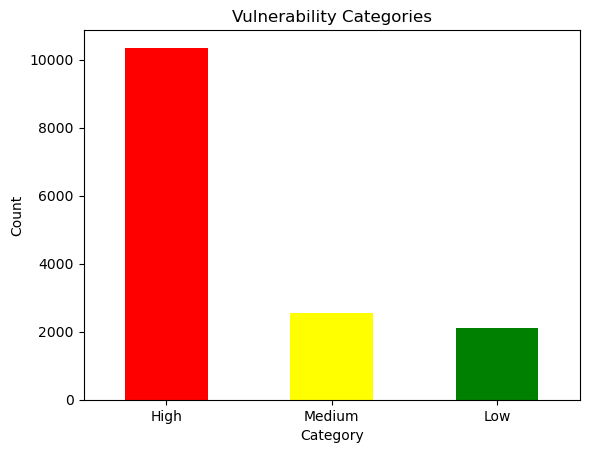

In [11]:
df = pd.read_excel('../model/BMMS_overview_vulnerability.xlsx')



# Simulating the 'Vulnerability Category' calculation, replace this with actual logic
df['Vulnerability Category'] = pd.cut(df['Vulnerability Score'], bins=[0, 0.01, 0.02, 1], 
                                      labels=['High', 'Medium', 'Low'], right=False)

# Count the occurrences of each category
vulnerability_counts = df['Vulnerability Category'].value_counts()

# Plot a bar chart
fig, ax = plt.subplots()
vulnerability_counts.plot(kind='bar', color=['red', 'yellow', 'green'], ax=ax)

# Add title and labels
ax.set_title('Vulnerability Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.xticks(rotation=0)  # Keep the category names horizontal for readability

# Save the plot as an image file
plt.savefig('vulnerability_categories_plot.png')

# Display the plot
plt.show()


### Plot Vulnerable Roads

In [ ]:
import pandas as pd
import folium
from branca.element import Element

# Load the datasets
roads_data = pd.read_csv('../data/raw/_roads3.csv')
bmms_data = pd.read_excel('../model/BMMS_overview_vulnerability.xlsx')

#load only for N and R roads
roads_data = roads_data[roads_data['road'].str.startswith(('N', 'R'))]
#also for the bmms data
bmms_data = bmms_data[bmms_data['road'].str.startswith(('N', 'R'))]
# Filter the BMMS data to include only relevant columns

# Initialize a map centered around Bangladesh
map_vulnerability = folium.Map(location=[23.6850, 90.3563], zoom_start=6)

# Define colors for each vulnerability category
vulnerability_colors = {
    'High': 'red',
    'Medium': 'orange',
    'Low': 'green'
}

# Plot road segments for context (using a simplified approach for visibility)
for _, row in roads_data.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=2,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=1,
        popup=f"Road: {row['road']}, LRP: {row['lrp']}"
    ).add_to(map_vulnerability)

# Plot points from BMMS_overview.xlsx with vulnerability categories
for _, row in bmms_data.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=5,
        color=vulnerability_colors.get(row['Vulnerability Category'], 'gray'),
        fill=True,
        fill_color=vulnerability_colors.get(row['Vulnerability Category'], 'gray'),
        fill_opacity=0.7,
        popup=f"Road: {row['road']}, KM: {row['km']}, Vulnerability: {row['Vulnerability Category']}"
    ).add_to(map_vulnerability)

# Function to add a legend to the map
def add_legend(map_obj):
    legend_html = """
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 150px; height: 90px; 
                 background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
                 ">&nbsp; <b>Vulnerability Legend</b> <br>
                  &nbsp; High &nbsp; <i class="fa fa-circle fa-1x" style="color:red"></i><br>
                  &nbsp; Medium &nbsp; <i class="fa fa-circle fa-1x" style="color:orange"></i><br>
                  &nbsp; Low &nbsp; <i class="fa fa-circle fa-1x" style="color:green"></i>
     </div>
     """
    legend_element = Element(legend_html)
    map_obj.get_root().html.add_child(legend_element)

# Add the legend to the map
add_legend(map_vulnerability)

# Display the map
map_vulnerability


# Pick top 10 most vulnerable roads

In [ ]:
top_vul_bridges = bmms_data.sort_values(by='Vulnerability Score', ascending=True)
top_10_vul_bridges = top_vul_bridges.head(10)

In [ ]:
print(top_10_vul_bridges[['road','zone','Vulnerability Score','Vulnerability Category','lat','lon']])

      road        zone  Vulnerability Score Vulnerability Category        lat  \
1375    N5     Rangpur             0.000382                   High  26.470854   
1386    N5     Rangpur             0.000387                   High  26.490065   
1350    N5     Rangpur             0.000402                   High  26.321240   
1326    N5     Rangpur             0.000404                   High  26.133779   
1344    N5     Rangpur             0.000408                   High  26.276786   
1345    N5     Rangpur             0.000410                   High  26.294632   
1276    N5     Rangpur             0.000417                   High  25.773769   
1685    N7      Khulna             0.000420                   High  22.584295   
3275  R370  Mymensingh             0.000425                   High  24.868410   
1309    N5     Rangpur             0.000426                   High  26.018504   

            lon  
1375  88.474124  
1386  88.371570  
1350  88.553573  
1326  88.536359  
1344  88.559073  


In [ ]:
data = pd.read_excel('../model/BMMS_overview_vulnerability.xlsx')

roads = pd.read_csv('../data/raw/_roads3.csv')
roads = roads[roads['road'].str.startswith(('N', 'R'))]

zones = zones = ['Dhaka', 'Comilla', 'Chittagong', 'Mymensingh', 'Sylhet', 'Rajshahi', 'Rangpur', 'Gopalganj', 'Barisal']

filtered_data = data[data['road'].isin(roads)]

#sort based on the vulnerability score
filtered_data = filtered_data.sort_values(by='Vulnerability Score', ascending=True)
print(filtered_data)

Empty DataFrame
Columns: [road, km, type, LRPName, name, length, condition, structureNr, roadName, chainage, width, constructionYear, spans, zone, circle, division, sub-division, lat, lon, EstimatedLoc, Hazard Level, Hazard Index, Bridge Weight, Infrastructure Vulnerability Index, Vulnerability Score, Vulnerability Category]
Index: []

[0 rows x 26 columns]


In [ ]:
vul_bridges = top_vul_bridges[['road','zone','Vulnerability Score','Vulnerability Category','lat','lon']]

In [ ]:
#save vul_bridges to csv
vul_bridges.to_csv('../model/vul_bridges.csv', index=False)